In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def get_data(PATH):
    return pd.read_csv('./dataset/' + PATH + '.csv', sep=',')

train_df = get_data('train')
test_df = get_data('test')
valid_df = get_data('gender_submission')

def diagnose_data(df):
    print(f'SHAPE:{df.shape}\n')
    print(f'COLUMNS:{sorted(df.columns)}\n')
    print(f'DTYPES:\n{df.dtypes}\n')
    print('INFO:'), df.info()
    print('\nN NULL:')
    for col in df.columns:
        print(f'{col}: {df[col].isnull().sum()}')
    print(f'\nN UNIQUES:\n{df.nunique()}')
    print(f'\nUNIQUES:')
    for col in sorted(df.columns):
        print(f'{col.upper()}:{df[col].unique()}')
    display(df.head())
    
def get_data_types(df, types='object'):
    col_num = [col for col in df.columns if df[col].dtype != object]
    col_cat = [col for col in df.columns if df[col].dtype == object]
    
    if types.lower() == 'object':
        return df[col_cat]
    elif types.lower() == 'numeric':
        return df[col_num]
    else:
        raise Exception("\nCheck kembali 'types' yang anda pilih, hanya ada 2 types yaitu:\n1. 'object'\n2. 'numeric'")

In [3]:
diagnose_data(train_df)

SHAPE:(891, 12)

COLUMNS:['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket']

DTYPES:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-n

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### MENGHITUNG BANYAKNYA NILAI NULL PADA SUATU KOLOM 

In [4]:
def percent_null(df):
    na_vals = df.isnull().sum()
    percentage = na_vals / df.shape[0]
    missing_data_df = pd.concat([na_vals, percentage],axis='columns',keys=['Total', 'Percent'])
    return missing_data_df.sort_values(by='Percent', ascending=False)

In [5]:
percent_null(train_df)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [6]:
percent_null(test_df)

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [7]:
null_df = percent_null(train_df)
get_col_by_null = null_df[null_df['Percent'] < .25].index

train_df = train_df[get_col_by_null]
test_df = test_df[list(set(get_col_by_null) & set(test_df.columns))]

In [8]:
diagnose_data(train_df)

SHAPE:(891, 11)

COLUMNS:['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket']

DTYPES:
Age            float64
Embarked        object
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
dtype: object

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          714 non-null    float64
 1   Embarked     889 non-null    object 
 2   PassengerId  891 non-null    int64  
 3   Survived     891 non-null    int64  
 4   Pclass       891 non-null    int64  
 5   Name         891 non-null    object 
 6   Sex          891 non-null    object 
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket      

,Age,Embarked,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,22.0,S,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,38.0,C,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,26.0,S,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,35.0,S,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,35.0,S,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [9]:
diagnose_data(test_df)

SHAPE:(418, 10)

COLUMNS:['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket']

DTYPES:
PassengerId      int64
Name            object
Fare           float64
Embarked        object
Parch            int64
Pclass           int64
Sex             object
Ticket          object
Age            float64
SibSp            int64
dtype: object

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Name         418 non-null    object 
 2   Fare         417 non-null    float64
 3   Embarked     418 non-null    object 
 4   Parch        418 non-null    int64  
 5   Pclass       418 non-null    int64  
 6   Sex          418 non-null    object 
 7   Ticket       418 non-null    object 
 8   Age          332 non-null    float64
 9   SibSp        418 non-null    int64  
dtypes: fl

,PassengerId,Name,Fare,Embarked,Parch,Pclass,Sex,Ticket,Age,SibSp
0,892,"Kelly, Mr. James",7.8292,Q,0,3,male,330911,34.5,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",7.0000,S,0,3,female,363272,47.0,1
2,894,"Myles, Mr. Thomas Francis",9.6875,Q,0,2,male,240276,62.0,0
3,895,"Wirz, Mr. Albert",8.6625,S,0,3,male,315154,27.0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",12.2875,S,1,3,female,3101298,22.0,1


### CHECK OUTLIER 

In [10]:
train_df.describe()

,Age,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,14.526497,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,0.420000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,20.125000,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,28.000000,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,38.000000,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,80.000000,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [11]:
test_df.describe()

,PassengerId,Fare,Parch,Pclass,Age,SibSp
count,418.000000,417.000000,418.000000,418.000000,332.000000,418.000000
mean,1100.500000,35.627188,0.392344,2.265550,30.272590,0.447368
std,120.810458,55.907576,0.981429,0.841838,14.181209,0.896760
min,892.000000,0.000000,0.000000,1.000000,0.170000,0.000000
25%,996.250000,7.895800,0.000000,1.000000,21.000000,0.000000
50%,1100.500000,14.454200,0.000000,3.000000,27.000000,0.000000
75%,1204.750000,31.500000,0.000000,3.000000,39.000000,1.000000
max,1309.000000,512.329200,9.000000,3.000000,76.000000,8.000000


In [12]:
def plot_cus(train_df, test_df, plot='box', col=None):
    plt.figure(figsize=(15,6))
    if plot == 'box':
        plt.subplot(121)
        train_df.boxplot()
        plt.title('train dataset')
        plt.subplot(122)
        test_df.boxplot()
        plt.title('test dataset')
    elif plot == 'hist':
        plt.subplot(121)
        train_df[col].plot(kind='hist')
        plt.title('train dataset')
        plt.subplot(122)
        test_df[col].plot(kind='hist')
        plt.title('test dataset')
    plt.show()    

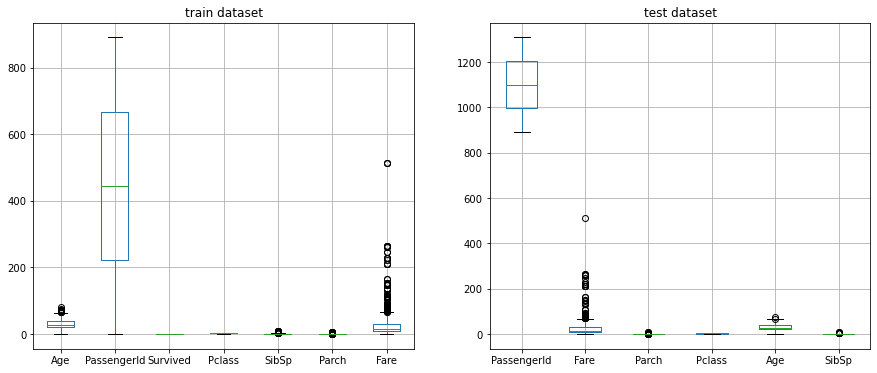

In [13]:
plot_cus(train_df, test_df, 'box')

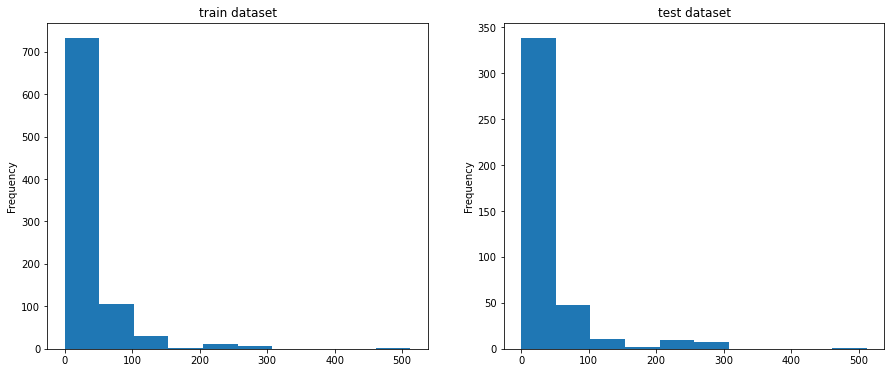

In [14]:
plot_cus(train_df, test_df, 'hist', 'Fare')

In [15]:
import warnings
warnings.filterwarnings('ignore')

def scatterplot_cus(df, dataset):
    numeric_df = get_data_types(df, 'numeric')
    plt.figure(figsize=(18,12))
    for i in range(len(numeric_df.columns)):
        plt.subplot(3,3,i+1)
        sns.scatterplot(numeric_df.columns[i], 'Fare', data=numeric_df)
    plt.suptitle(f'Scatter plot Fare terhadap setiap colom ({dataset})') 
    plt.show()

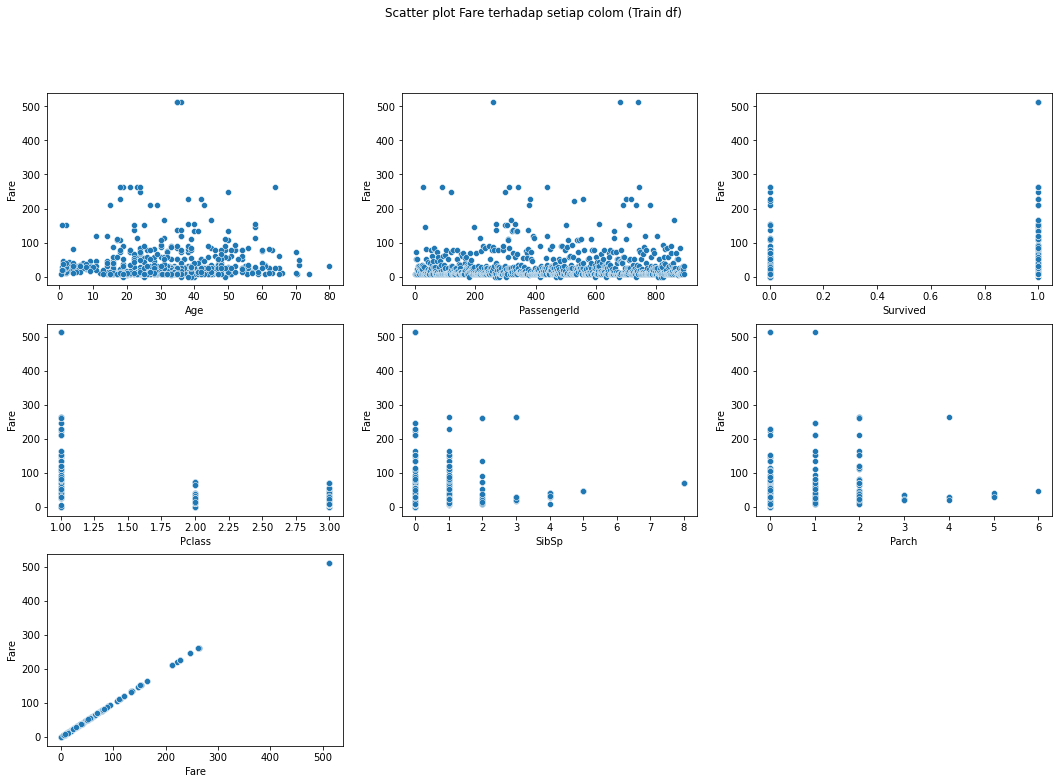

In [16]:
scatterplot_cus(train_df, 'Train df')

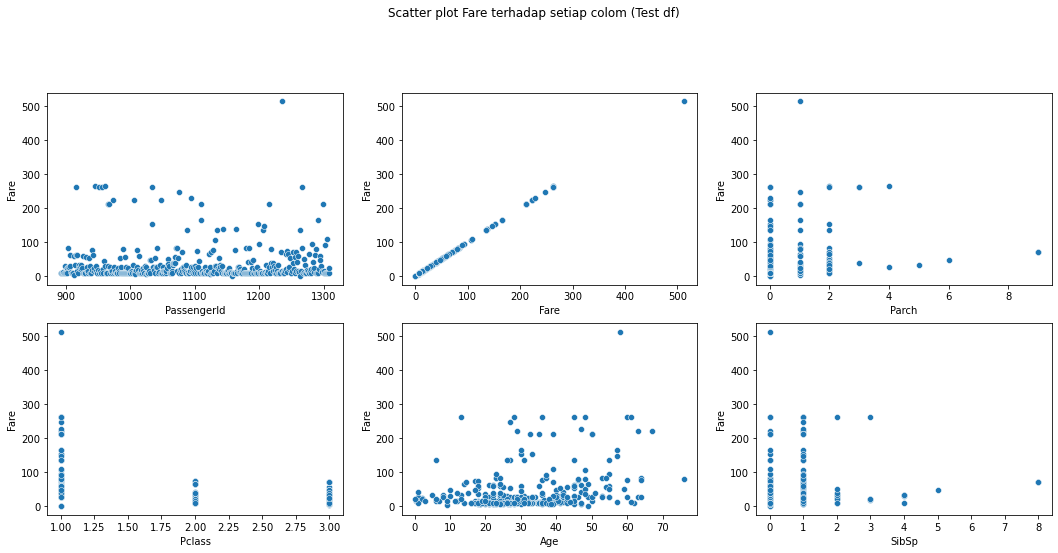

In [17]:
scatterplot_cus(test_df, 'Test df')

In [18]:
q1, q3 = train_df['Fare'].quantile([.25, .75])
iqr = q3 - q1
lower_limit, upper_limit = q1 - iqr*1.5, q3 + iqr*1.5

new_train_df = train_df[train_df['Fare'].between(lower_limit, upper_limit)]
new_train_df.describe()

,Age,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,613.000000,775.000000,775.000000,775.00000,775.000000,775.000000,775.000000
mean,28.946574,445.806452,0.339355,2.48000,0.437419,0.340645,17.822091
std,14.368139,260.116285,0.473796,0.73439,0.899838,0.785914,13.578085
min,0.420000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000
25%,20.000000,213.500000,0.000000,2.00000,0.000000,0.000000,7.895800
50%,28.000000,450.000000,0.000000,3.00000,0.000000,0.000000,13.000000
75%,37.000000,670.500000,1.000000,3.00000,1.000000,0.000000,26.000000
max,80.000000,891.000000,1.000000,3.00000,5.000000,6.000000,65.000000


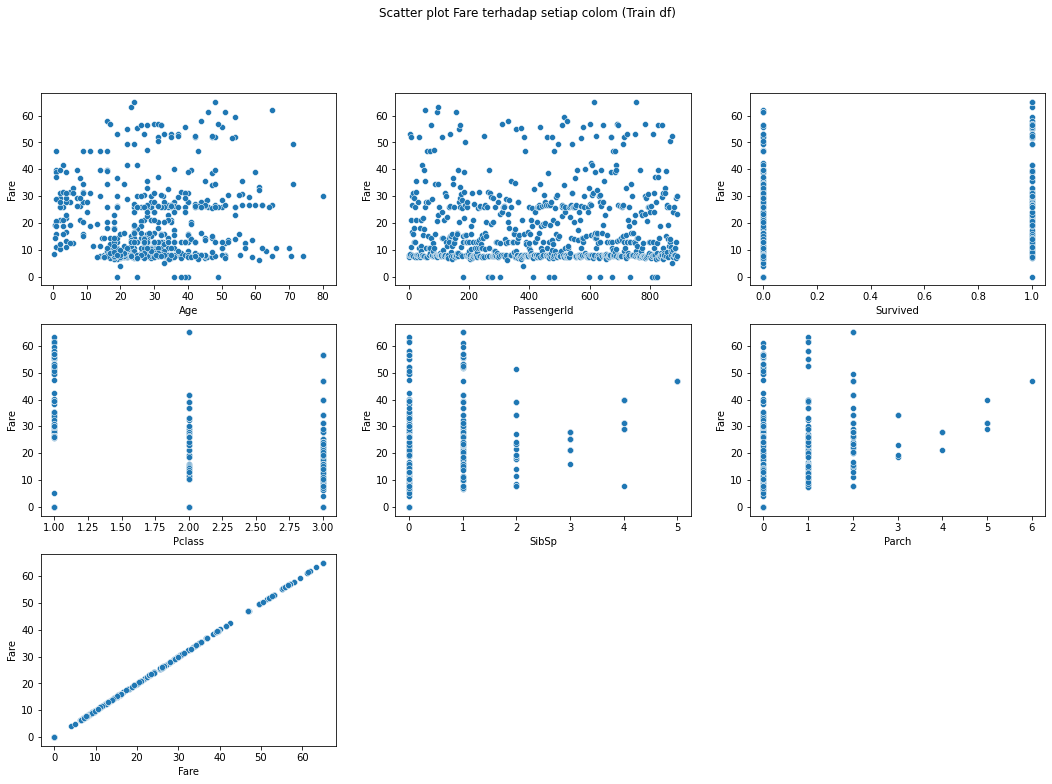

In [19]:
scatterplot_cus(new_train_df, 'Train df')

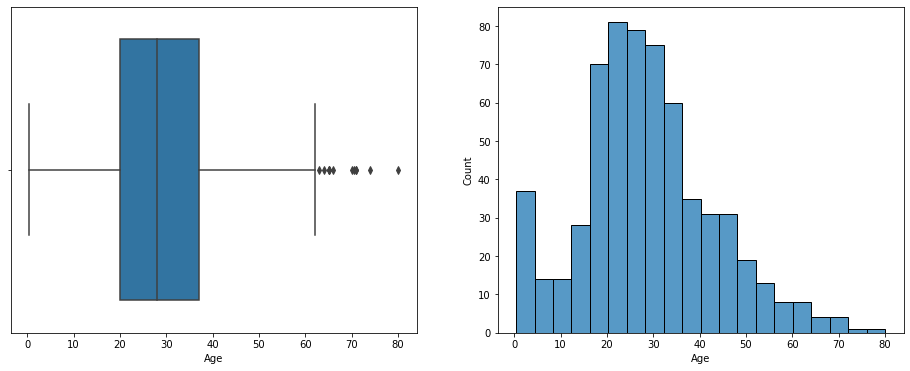

In [20]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.boxplot(new_train_df['Age'])
plt.subplot(122)
sns.histplot(new_train_df['Age'])
plt.show()

In [21]:
q1, q3 = new_train_df['Age'].quantile([.25, .75])
iqr = q3 - q1
lower_limit, upper_limit = q1 - iqr*1.5, q3 + iqr*1.5

train_df = new_train_df[new_train_df['Age'].between(lower_limit, upper_limit)]
train_df.describe()

,Age,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,28.152662,449.743760,0.357737,2.444260,0.497504,0.407654,18.610960
std,13.336564,263.175551,0.479733,0.726157,0.962848,0.855497,13.669143
min,0.420000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,20.000000,212.000000,0.000000,2.000000,0.000000,0.000000,7.925000
50%,28.000000,447.000000,0.000000,3.000000,0.000000,0.000000,13.000000
75%,36.000000,685.000000,1.000000,3.000000,1.000000,1.000000,26.250000
max,62.000000,891.000000,1.000000,3.000000,5.000000,6.000000,65.000000


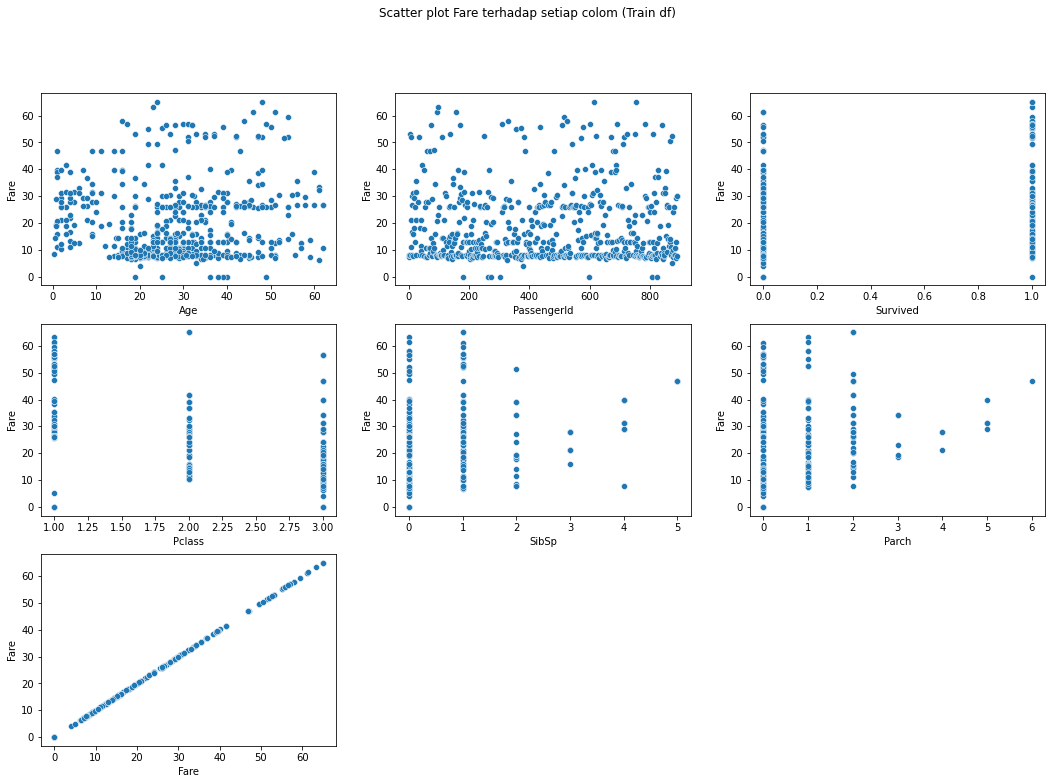

In [22]:
scatterplot_cus(train_df, 'Train df')

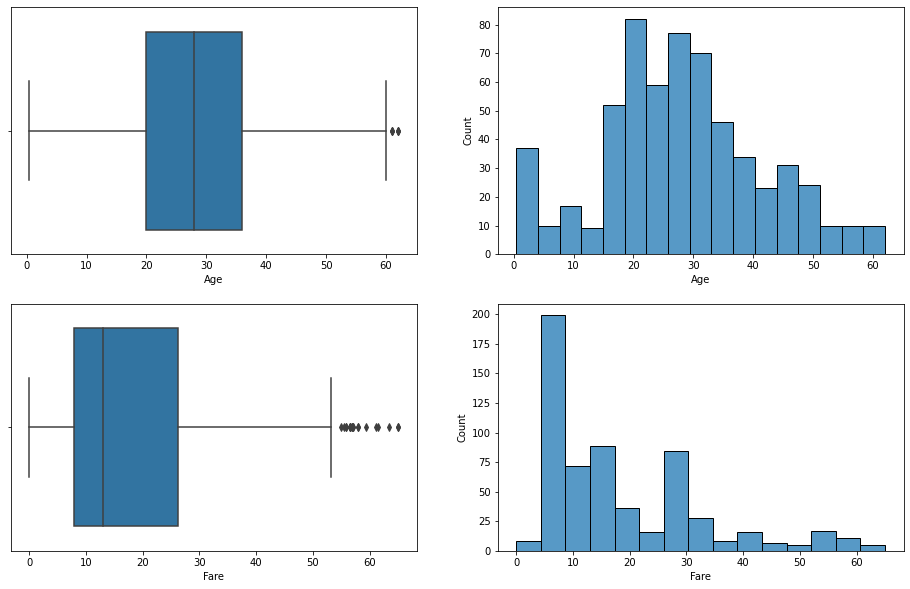

In [23]:
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.boxplot(train_df['Age'])
plt.subplot(222)
sns.histplot(train_df['Age'])
plt.subplot(223)
sns.boxplot(train_df['Fare'])
plt.subplot(224)
sns.histplot(train_df['Fare'])
plt.show()

### MENGHILANGKAN NILAI NULL/NAN

In [24]:
diagnose_data(train_df)

SHAPE:(601, 11)

COLUMNS:['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket']

DTYPES:
Age            float64
Embarked        object
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
dtype: object

INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          601 non-null    float64
 1   Embarked     601 non-null    object 
 2   PassengerId  601 non-null    int64  
 3   Survived     601 non-null    int64  
 4   Pclass       601 non-null    int64  
 5   Name         601 non-null    object 
 6   Sex          601 non-null    object 
 7   SibSp        601 non-null    int64  
 8   Parch        601 non-null    int64  
 9   Ticket      

,Age,Embarked,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,22.0,S,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
2,26.0,S,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,35.0,S,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,35.0,S,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
6,54.0,S,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625


In [25]:
diagnose_data(test_df)

SHAPE:(418, 10)

COLUMNS:['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket']

DTYPES:
PassengerId      int64
Name            object
Fare           float64
Embarked        object
Parch            int64
Pclass           int64
Sex             object
Ticket          object
Age            float64
SibSp            int64
dtype: object

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Name         418 non-null    object 
 2   Fare         417 non-null    float64
 3   Embarked     418 non-null    object 
 4   Parch        418 non-null    int64  
 5   Pclass       418 non-null    int64  
 6   Sex          418 non-null    object 
 7   Ticket       418 non-null    object 
 8   Age          332 non-null    float64
 9   SibSp        418 non-null    int64  
dtypes: fl

,PassengerId,Name,Fare,Embarked,Parch,Pclass,Sex,Ticket,Age,SibSp
0,892,"Kelly, Mr. James",7.8292,Q,0,3,male,330911,34.5,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",7.0000,S,0,3,female,363272,47.0,1
2,894,"Myles, Mr. Thomas Francis",9.6875,Q,0,2,male,240276,62.0,0
3,895,"Wirz, Mr. Albert",8.6625,S,0,3,male,315154,27.0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",12.2875,S,1,3,female,3101298,22.0,1


In [26]:
new_test_df = test_df.copy(deep=True)
null_cols = test_df.isnull().sum()
get_null_cols = null_cols[null_cols > 0].index
for col in get_null_cols:
    new_test_df[col] = test_df[col].fillna(test_df[col].mean())

In [27]:
diagnose_data(new_test_df)

SHAPE:(418, 10)

COLUMNS:['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket']

DTYPES:
PassengerId      int64
Name            object
Fare           float64
Embarked        object
Parch            int64
Pclass           int64
Sex             object
Ticket          object
Age            float64
SibSp            int64
dtype: object

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Name         418 non-null    object 
 2   Fare         418 non-null    float64
 3   Embarked     418 non-null    object 
 4   Parch        418 non-null    int64  
 5   Pclass       418 non-null    int64  
 6   Sex          418 non-null    object 
 7   Ticket       418 non-null    object 
 8   Age          418 non-null    float64
 9   SibSp        418 non-null    int64  
dtypes: fl

,PassengerId,Name,Fare,Embarked,Parch,Pclass,Sex,Ticket,Age,SibSp
0,892,"Kelly, Mr. James",7.8292,Q,0,3,male,330911,34.5,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",7.0000,S,0,3,female,363272,47.0,1
2,894,"Myles, Mr. Thomas Francis",9.6875,Q,0,2,male,240276,62.0,0
3,895,"Wirz, Mr. Albert",8.6625,S,0,3,male,315154,27.0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",12.2875,S,1,3,female,3101298,22.0,1


In [28]:
train_df

,Age,Embarked,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,22.0,S,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
2,26.0,S,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,35.0,S,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,35.0,S,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
6,54.0,S,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625
...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,Q,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,0,5,382652,29.1250
886,27.0,S,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,19.0,S,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
889,26.0,C,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


### FEATURE SELECTION

In [29]:
from sklearn.preprocessing import LabelEncoder

train_cat_cols = list(get_data_types(train_df, 'object').columns)
train_cat_cols.append('Survived')

label_encoder = LabelEncoder()

new_train_df = train_df.copy(deep=True)
for col in ['Name', 'Ticket']:
    new_train_df[col] = label_encoder.fit_transform(train_df[col])

new_train_df = pd.get_dummies(new_train_df, columns=['Embarked', 'Sex'])

In [30]:
diagnose_data(new_train_df)

SHAPE:(601, 14)

COLUMNS:['Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex_female', 'Sex_male', 'SibSp', 'Survived', 'Ticket']

DTYPES:
Age            float64
PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
Sex_female       uint8
Sex_male         uint8
dtype: object

INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          601 non-null    float64
 1   PassengerId  601 non-null    int64  
 2   Survived     601 non-null    int64  
 3   Pclass       601 non-null    int64  
 4   Name         601 non-null    int32  
 5   SibSp        601 non-null    int64  
 6   Parch        601 non

,Age,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,1,0,3,86,1,0,372,7.2500,0,0,1,0,1
2,26.0,3,1,3,261,0,0,475,7.9250,0,0,1,1,0
3,35.0,4,1,1,204,1,0,31,53.1000,0,0,1,1,0
4,35.0,5,0,3,14,0,0,339,8.0500,0,0,1,0,1
6,54.0,7,0,1,371,0,0,51,51.8625,0,0,1,0,1


In [31]:
from sklearn.feature_selection import mutual_info_classif

train_num_cols = list(get_data_types(train_df, 'numeric').columns)
get_new_cat_cols = [col for col in new_train_df.columns if col not in train_num_cols]

mi = mutual_info_classif(new_train_df[get_new_cat_cols], new_train_df['Survived'])

feature_score = pd.DataFrame(
    {
        'Feature': new_train_df[get_new_cat_cols].columns,
        'MI': mi,
    }
).sort_values(
    'MI', ascending=False
).set_index('Feature')

feature_score.style.bar(
    subset=['MI'], color='grey'
)

,MI
Feature,
Sex_female,0.120556
Sex_male,0.115863
Ticket,0.087551
Embarked_C,0.026397
Embarked_S,0.013214
Name,0.009062
Embarked_Q,0.000000


In [67]:
selected_column = feature_score[feature_score['MI'] > 0.1].index
selected_column

Index(['Sex_female', 'Sex_male'], dtype='object', name='Feature')

In [73]:
train_cat_df = new_train_df[selected_column] # MEMILIH COLUMN DENGAN NILAI CATEGORY YANG MEMILIKI KORELASI YANG KUAT 
train_cat_df

,Sex_female,Sex_male
0,0,1
2,1,0
3,1,0
4,0,1
6,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [75]:
from kydavra import ANOVASelector

anova = ANOVASelector()
selected_column = anova.select(new_train_df[train_num_cols], 'Survived')

train_num_df = new_train_df[selected_column]
train_num_df

,Age,Pclass,Parch,Fare
0,22.0,3,0,7.2500
2,26.0,3,0,7.9250
3,35.0,1,0,53.1000
4,35.0,3,0,8.0500
6,54.0,1,0,51.8625
...,...,...,...,...
885,39.0,3,5,29.1250
886,27.0,2,0,13.0000
887,19.0,1,0,30.0000
889,26.0,1,0,30.0000


In [91]:
train_df = pd.concat([new_train_df['Survived'], train_num_df, train_cat_df], axis='columns')
train_df

,Survived,Age,Pclass,Parch,Fare,Sex_female,Sex_male
0,0,22.0,3,0,7.2500,0,1
2,1,26.0,3,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,0,35.0,3,0,8.0500,0,1
6,0,54.0,1,0,51.8625,0,1
...,...,...,...,...,...,...,...
885,0,39.0,3,5,29.1250,1,0
886,0,27.0,2,0,13.0000,0,1
887,1,19.0,1,0,30.0000,1,0
889,1,26.0,1,0,30.0000,0,1


In [104]:
test_df = pd.get_dummies(data=new_test_df, columns=['Sex'])
test_df = test_df[[col for col in train_df.columns if col != 'Survived']]
test_df

,Age,Pclass,Parch,Fare,Sex_female,Sex_male
0,34.50000,3,0,7.8292,0,1
1,47.00000,3,0,7.0000,1,0
2,62.00000,2,0,9.6875,0,1
3,27.00000,3,0,8.6625,0,1
4,22.00000,3,1,12.2875,1,0
...,...,...,...,...,...,...
413,30.27259,3,0,8.0500,0,1
414,39.00000,1,0,108.9000,1,0
415,38.50000,3,0,7.2500,0,1
416,30.27259,3,0,8.0500,0,1


### SCALING DATA

In [105]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_scale = [col for col in train_df.columns if train_df[col].max() > 1]

train_df[cols_scale] = scaler.fit_transform(train_df[cols_scale])
test_df[cols_scale] = scaler.fit_transform(test_df[cols_scale])

In [107]:
diagnose_data(train_df)

SHAPE:(601, 7)

COLUMNS:['Age', 'Fare', 'Parch', 'Pclass', 'Sex_female', 'Sex_male', 'Survived']

DTYPES:
Survived        int64
Age           float64
Pclass        float64
Parch         float64
Fare          float64
Sex_female      uint8
Sex_male        uint8
dtype: object

INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    601 non-null    int64  
 1   Age         601 non-null    float64
 2   Pclass      601 non-null    float64
 3   Parch       601 non-null    float64
 4   Fare        601 non-null    float64
 5   Sex_female  601 non-null    uint8  
 6   Sex_male    601 non-null    uint8  
dtypes: float64(4), int64(1), uint8(2)
memory usage: 29.3 KB

N NULL:
Survived: 0
Age: 0
Pclass: 0
Parch: 0
Fare: 0
Sex_female: 0
Sex_male: 0

N UNIQUES:
Survived        2
Age            78
Pclass          3
Parch           7
Fare          175
Se

,Survived,Age,Pclass,Parch,Fare,Sex_female,Sex_male
0,0,0.350438,1.0,0.0,0.111538,0,1
2,1,0.415395,1.0,0.0,0.121923,1,0
3,1,0.561546,0.0,0.0,0.816923,1,0
4,0,0.561546,1.0,0.0,0.123846,0,1
6,0,0.870088,0.0,0.0,0.797885,0,1


In [108]:
diagnose_data(test_df)

SHAPE:(418, 6)

COLUMNS:['Age', 'Fare', 'Parch', 'Pclass', 'Sex_female', 'Sex_male']

DTYPES:
Age           float64
Pclass        float64
Parch         float64
Fare          float64
Sex_female      uint8
Sex_male        uint8
dtype: object

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   Pclass      418 non-null    float64
 2   Parch       418 non-null    float64
 3   Fare        418 non-null    float64
 4   Sex_female  418 non-null    uint8  
 5   Sex_male    418 non-null    uint8  
dtypes: float64(4), uint8(2)
memory usage: 14.0 KB

N NULL:
Age: 0
Pclass: 0
Parch: 0
Fare: 0
Sex_female: 0
Sex_male: 0

N UNIQUES:
Age            80
Pclass          3
Parch           8
Fare          170
Sex_female      2
Sex_male        2
dtype: int64

UNIQUES:
AGE:[0.4527232  0.61756561 0.8153765  0.35381775 0.2878807

,Age,Pclass,Parch,Fare,Sex_female,Sex_male
0,0.452723,1.0,0.000000,0.015282,0,1
1,0.617566,1.0,0.000000,0.013663,1,0
2,0.815377,0.5,0.000000,0.018909,0,1
3,0.353818,1.0,0.000000,0.016908,0,1
4,0.287881,1.0,0.111111,0.023984,1,0


### CHECK IMBALANCE DATA DI COLUMN LABEL 

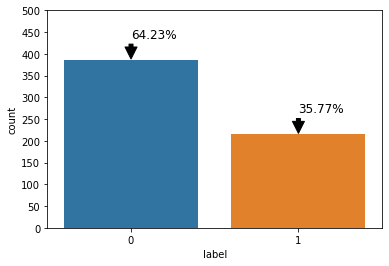

In [132]:
def plot_balance(df, target_col):
    major, minor = df[target_col].value_counts()
    percent_minor = (minor / (minor + major))*100
    percent_major = (major / (minor + major))*100
    
    ax = sns.countplot(x=df[target_col])

    ax.annotate(
        f'{round(percent_major, 2)}%', 
        xy=(0, major), 
        xytext=(0, major+50), 
        fontsize=12,
        arrowprops=dict(facecolor='black', shrink=0.05)
    )

    ax.annotate(
        f'{round(percent_minor, 2)}%', 
        xy=(1, minor), 
        xytext=(1, minor+50), 
        fontsize=12,
        arrowprops=dict(facecolor='black', shrink=0.05)
    )

    plt.xlabel('label')
    plt.yticks(np.arange(0, train_df[target_col].value_counts().max()+150, 50))
    plt.show()
    
plot_balance(train_df, 'Survived')

In [138]:
X = train_df.drop(columns='Survived', axis='columns')
y = train_df['Survived']

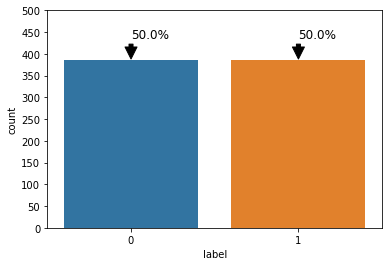

In [143]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=12)
X_sm, y_sm = smote.fit_resample(X, y)

plot_balance(pd.concat([X_sm, y_sm], axis='columns'), 'Survived')

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    test_size=.25,
    random_state=12,
    stratify=y_sm
)
print(y_train.value_counts())
print(y_test.value_counts())

0    290
1    289
Name: Survived, dtype: int64
1    97
0    96
Name: Survived, dtype: int64


### TUNING MODEL 

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [176]:
model_params=[
    {
        'model_name': 'DecisionTreeClassifier',
        'model': DecisionTreeClassifier()
    },
    {
        'model_name': 'RandomForestClassifier',
        'model': RandomForestClassifier()
    },
    {
        'model_name': 'LogisticRegression',
        'model': LogisticRegression()
    },
    {
        'model_name': 'SVM',
        'model': SVC()
    },
    {
        'model_name': 'KNeighborsClassifier',
        'model': KNeighborsClassifier()
    }
]

def tuning_models(X, y, model_params, model_name='model_name', model='model', max_splits=20, get_mean=False):
    rs = ShuffleSplit(n_splits=max_splits, test_size=.2)
    estimated_model = {}
    for idx in range(len(model_params)):
        cv_results = cross_validate(
            model_params[idx]['model'], X, y, cv=rs, scoring='accuracy'
        )
        estimated_model[model_params[idx]['model_name']]= cv_results['test_score']
    df_scoring = pd.DataFrame(estimated_model, index=[f'score {i+1}' for i in range(max_splits)])
    
    if get_mean:
        for col in df_scoring.columns:
            print(f'{col}: {df_scoring[col].mean()}')
    else:
        return df_scoring

In [181]:
display(tuning_models(X_train, y_train, model_params, model_name='model_name', model='model', max_splits=25, get_mean=False))

print(tuning_models(X_train, y_train, model_params, model_name='model_name', model='model', max_splits=25, get_mean=True))

,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression,SVM,KNeighborsClassifier
score 1,0.724138,0.801724,0.793103,0.775862,0.818966
score 2,0.681034,0.793103,0.715517,0.758621,0.818966
score 3,0.706897,0.810345,0.775862,0.758621,0.784483
score 4,0.775862,0.758621,0.801724,0.775862,0.775862
score 5,0.801724,0.741379,0.801724,0.801724,0.793103
score 6,0.715517,0.750000,0.827586,0.715517,0.741379
score 7,0.767241,0.775862,0.827586,0.767241,0.793103
score 8,0.750000,0.818966,0.784483,0.741379,0.793103
score 9,0.741379,0.767241,0.784483,0.758621,0.836207
score 10,0.741379,0.784483,0.750000,0.741379,0.784483


DecisionTreeClassifier: 0.7493103448275862
RandomForestClassifier: 0.7886206896551723
LogisticRegression: 0.7934482758620692
SVM: 0.779655172413793
KNeighborsClassifier: 0.7975862068965518
None


In [193]:
scores = []

clf = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={   
        'n_neighbors': [3, 5, 8, 11],
        'weights': ['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [15, 30, 45]
    },
    cv=20,
    n_jobs=4,
    return_train_score=False
)
clf.fit(X_train, y_train)
scores.append({
    'model': 'KNeighborsClassifier',
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})

In [195]:
cv_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
cv_df.loc[0, 'best_params']
# cv_df

{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 11, 'weights': 'uniform'}

In [198]:
from sklearn.metrics import classification_report

model = KNeighborsClassifier(
    algorithm= 'auto',
    leaf_size= 15, 
    n_neighbors= 11, 
    weights= 'uniform'
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        96
           1       0.78      0.85      0.81        97

    accuracy                           0.80       193
   macro avg       0.81      0.80      0.80       193
weighted avg       0.81      0.80      0.80       193



In [208]:
y_pred_final = model.predict(test_df)
Id = valid_df['PassengerId']

print(classification_report(valid_df['Survived'], y_pred_final))

              precision    recall  f1-score   support

           0       0.98      0.71      0.83       266
           1       0.66      0.98      0.79       152

    accuracy                           0.81       418
   macro avg       0.82      0.85      0.81       418
weighted avg       0.87      0.81      0.81       418

